In [3]:
import pandas as pd
import matplotlib as plt

file_location = "survey.csv"
df = pd.read_csv(file_location)

print(df.head(5))


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [9]:
# clean age column
df1 = df[df['Age'] > 0]
df2 = df1[df1['Age'] < 100]

# group Age
# bins = [0, 13, 19, 35, 49, 100]
# labels = ['Kids', 'Teen', 'Young', 'Adult', 'Senior']
# df2['AgeGroup'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)


df2.loc[df2['Age'].between(0, 13, 'both'), 'AgeGroup'] = 'Kids'
df2.loc[df2['Age'].between(13, 19, 'right'), 'AgeGroup'] = 'Teen'
df2.loc[df2['Age'].between(19, 35, 'right'), 'AgeGroup'] = 'Young'
df2.loc[df2['Age'].between(35, 49, 'right'), 'AgeGroup'] = 'Adult'
df2.loc[df2['Age'].between(49, 100, 'right'), 'AgeGroup'] = 'Senior'

In [10]:
# group Gender
genders_male = ["M", "Male", "male", "m", 'Male-ish', 'maile',
                'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)',
                'Make', 'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']

genders_female = ['Female', 'female', 'Cis Female', 'F', 'f',
                  'Woman', 'Femake', 'woman', 'fluid', 'Female ',
                  'cis-female/femme', 'Female (cis)', 'femail']

genders_non_binary = ['Trans-female', 'queer/she/they',
                      'non-binary', 'Nah', 'Enby', 'Genderqueer',  'Androgyne',
                      'Agender', 'Guy (-ish) ^_^',  'Trans woman', 'Neuter',
                      'Female (trans)', 'queer', 'A little about you', 'ostensibly male, unsure what that really means']

df2.loc[(df2['Gender'].isin(genders_male)), "Gender"] = "Male"
df2.loc[(df2['Gender'].isin(genders_female)), "Gender"] = "Female"
df2.loc[(df2['Gender'].isin(genders_non_binary)), "Gender"] = "NonBinary"


# group Country
NorthAmerica = ['United States', 'Canada',
                'Mexico', 'Costa Rica', 'Bahamas, The']
Asia = ['India', 'Israel', 'Singapore',
        'Japan', 'Thailand', 'China', 'Philippines']
Europe = ['United Kingdom', 'Bulgaria', 'France', 'Portugal',
          'Netherlands', 'Switzerland', 'Poland', 'Germany', 'Russia',
          'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden',
          'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland',
          'Bosnia and Herzegovina', 'Hungary', 'Croatia',
          'Norway', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'Czech Republic']
Australia = ['Australia', 'New Zealand']
SouthAmerica = ['Brazil', 'Colombia', 'Uruguay']
Africa = ['South Africa', 'Nigeria']

df2.loc[(df2['Country'].isin(NorthAmerica)), "Country"] = "NorthAmerica"
df2.loc[(df2['Country'].isin(Asia)), "Country"] = "Asia"
df2.loc[(df2['Country'].isin(Europe)), "Country"] = "Europe"
df2.loc[(df2['Country'].isin(Australia)), "Country"] = "Australia"
df2.loc[(df2['Country'].isin(SouthAmerica)), "Country"] = "SouthAmerica"
df2.loc[(df2['Country'].isin(Africa)), "Country"] = "Africa"

df2.rename(columns={'Country': 'Region'}, inplace=True)


In [14]:
df2.loc[(df2['wellness_program'].isin(['No', "Don't know"])), "wellness_program"] = "No"
df2.loc[(df2['wellness_program'].isin(['Yes'])), "wellness_program"] = "Yes"

df2.loc[(df2['seek_help'].isin(['No', "Don't know"])), "seek_help"] = "No"
df2.loc[(df2['seek_help'].isin(['Yes'])), "seek_help"] = "Yes"

df2.loc[(df2['mental_health_consequence'].isin(['No'])), "mental_health_consequence"] = "No"
df2.loc[(df2['mental_health_consequence'].isin(['Yes', 'Maybe'])), "mental_health_consequence"] = "Yes"

df2.loc[(df2['phys_health_consequence'].isin(['No'])), "phys_health_consequence"] = "No"
df2.loc[(df2['phys_health_consequence'].isin(['Yes', 'Maybe'])), "phys_health_consequence"] = "Yes"


<AxesSubplot:xlabel='Region'>

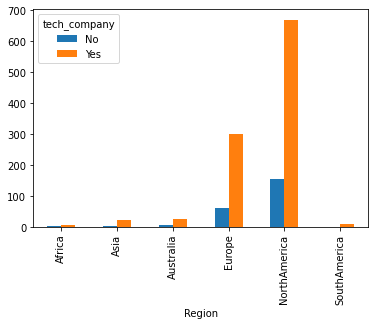

In [16]:
final_data = df2[['AgeGroup', 'Region', 'Gender', 'wellness_program',
                  'seek_help', 'mental_health_consequence', 'phys_health_consequence',
                  'remote_work', 'tech_company', 'family_history',
                  'treatment', 'obs_consequence']]

df3=final_data.groupby(['Region','tech_company']).size()
df3=df3.unstack()
df3.plot(kind='bar')

## Analysis on North America

<AxesSubplot:ylabel='mental_health_consequence'>

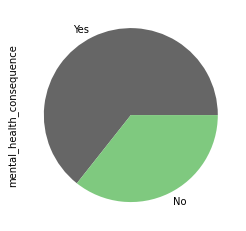

In [17]:
df4 = final_data.query('remote_work == "Yes" & treatment == "Yes" & Region == "NorthAmerica" & wellness_program == "No"')

# df5 = final_data.loc[final_data['remote_work'] == 'Yes']

# df6 = df5.loc[df5['treatment'] == 'Yes']

# df7 = df6.loc[df6['Region'] == 'NorthAmerica']

# df8 = df7.loc[df7['wellness_program'] == 'No']

df4['mental_health_consequence'].value_counts().plot(kind="pie", colormap="Accent_r")


<AxesSubplot:xlabel='Mental Health consequence', ylabel='count'>

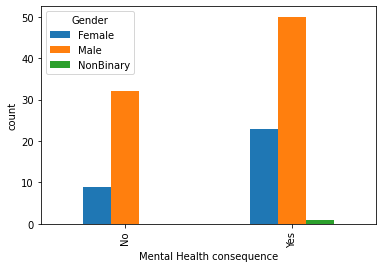

In [18]:
df5=df4.groupby(['mental_health_consequence','Gender']).size()
df5=df5.unstack()
df5.plot(kind='bar', xlabel="Mental Health consequence", ylabel="count")

## Analysis on Europe

<AxesSubplot:xlabel='Mental Health consequence', ylabel='count'>

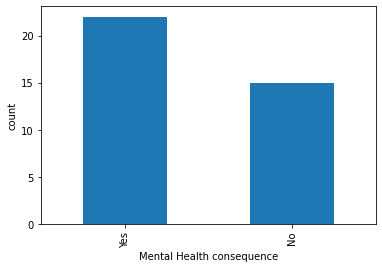

In [19]:
fd1 = final_data.query('remote_work == "Yes" & treatment == "Yes" & Region == "Europe" & wellness_program == "No"')
fd1['mental_health_consequence'].value_counts().plot(kind="bar",xlabel="Mental Health consequence", ylabel="count")

<AxesSubplot:ylabel='mental_health_consequence'>

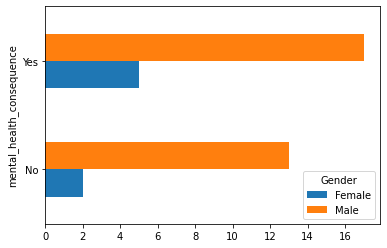

In [20]:
fd2=fd1.groupby(['mental_health_consequence','Gender']).size()
fd2=fd2.unstack()
fd2.plot(kind='barh')